<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/Entropy_in_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy in language

What is "Entropy"?

This word comes with Claude Shannon, in information theory. Entropy is an unpredictable thing. And to Shannon, unpredictable things convey more information!

More entrophy, more information. Entropy is a metric, to measure how much unpredictable is something. Unit of entropy = bits, and comes from 0 to 1.

Example: in a situation of flipping coing, probability goes from 0 to 1, and the entropy is higher in 0.5 pointm where is more predictable.

Computing entropy of head and tails = (.5) by (log two) of (.5) and sum over two points (head and tails)


- download text
www.gutenberg.org/files/35/35-0.txt

- remove formatting characters
- split text into words, show frequencies of word lenghths
- show frequencies of letters
- compute ENTROPY of each letter
- compute lag-1 conditional entropy

In [3]:
import requests

book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [4]:
book

<Response [200]>

In [5]:
text = book.text
len(text)

204357

In [6]:
text[0:100]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of a'

In [7]:
import re

replace1 = re.compile('\r\n\r\nâ\x80\x9c') # new paragraph
replace2 = re.compile('â\x80\x9c') # open quote
replace3 = re.compile('â\x80\x9d') # close quote
replace4 = re.compile('\r\n') # new line
replace5 = re.compile('\â\x80\x94') # hyphen
replace6 = re.compile('\â\x80\x99') # single apostrophe
replace7 = re.compile('\â\x80\x98') #  single quote
replace8 = re.compile('_') # underscore, used for stressing

In [8]:
text = replace1.sub(' ', text)
text = replace2.sub(' ', text)
text = replace3.sub(' ', text)
text = replace4.sub(' ', text)
text = replace5.sub(' ', text)
text = replace6.sub(' ', text)
text = replace7.sub(' ', text)
text = replace8.sub(' ', text)

In [9]:
text = text[3:]
text

'The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  X

In [10]:
words_length = [] 

for word in text.split():
  words_length.append(len(word))

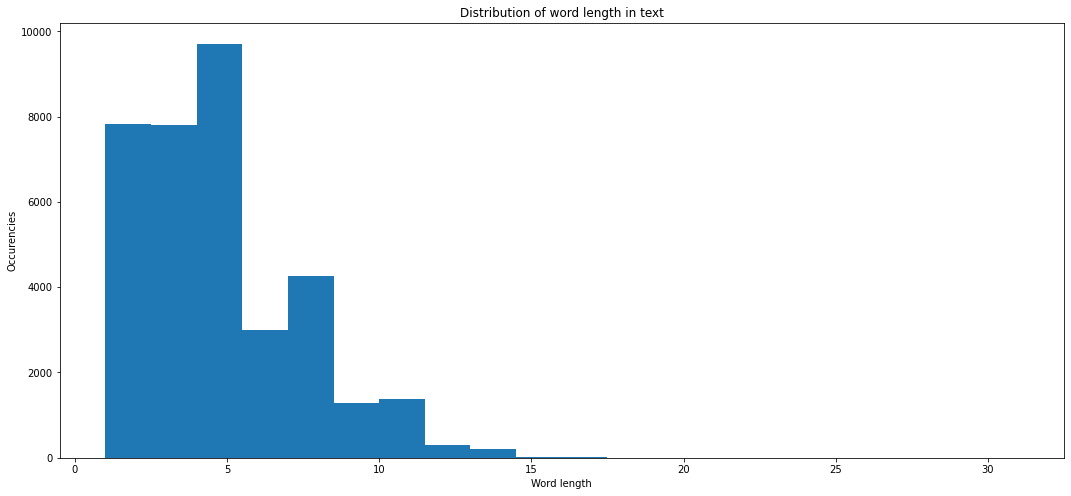

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=[18, 8])
plt.hist(words_length, bins=20)
plt.title('Distribution of word length in text')
plt.xlabel('Word length')
plt.ylabel('Occurencies')
plt.show()

In [12]:
import string

letters = string.ascii_lowercase
letters

'abcdefghijklmnopqrstuvwxyz'

In [37]:
letters_count = {}

for letter in letters:
  letter_count = text.lower().count(letter)
  letters_count.update({letter:letter_count})

In [38]:
letters_count

{'a': 12752,
 'b': 2171,
 'c': 4049,
 'd': 6868,
 'e': 19781,
 'f': 3749,
 'g': 3512,
 'h': 8841,
 'i': 11312,
 'j': 187,
 'k': 1231,
 'l': 6658,
 'm': 4420,
 'n': 11012,
 'o': 11157,
 'p': 2867,
 'q': 106,
 'r': 8895,
 's': 9313,
 't': 15155,
 'u': 4328,
 'v': 1435,
 'w': 3524,
 'x': 282,
 'y': 3024,
 'z': 108}

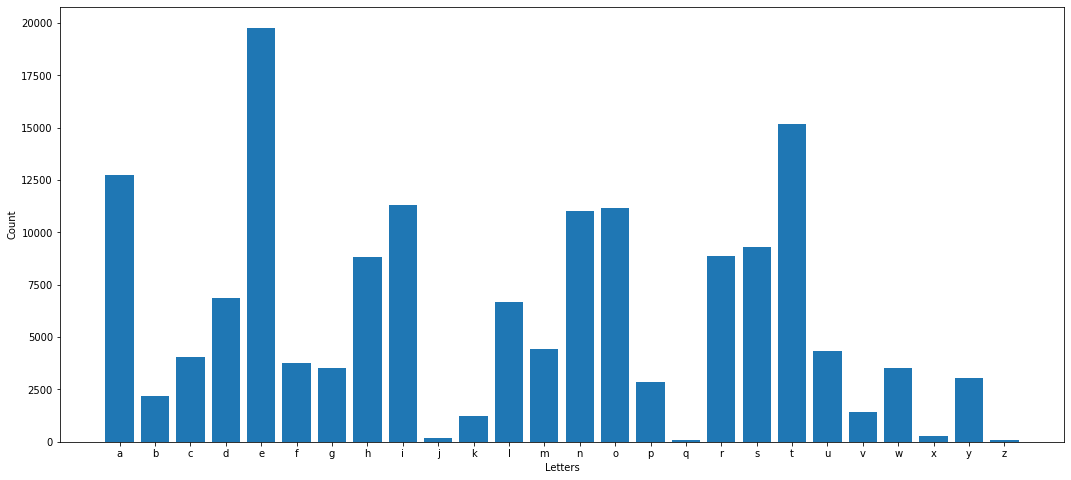

In [51]:
plt.figure(figsize=[18, 8])
plt.bar(range(len(letters)), letters_count.values())
plt.xticks(range(len(letters_count)), labels=letters)
plt.xlabel('Letters')
plt.ylabel('Count')
plt.show()

# Letter entropy

Let's calculate the letter entropy.

In [57]:
sum(letters_count.values())

156737

In [63]:
letters_probability = {}

for letter in letters_count:
  letter_prob = letters_count[letter] / sum(letters_count.values())
  letters_probability.update({letter:letter_prob})

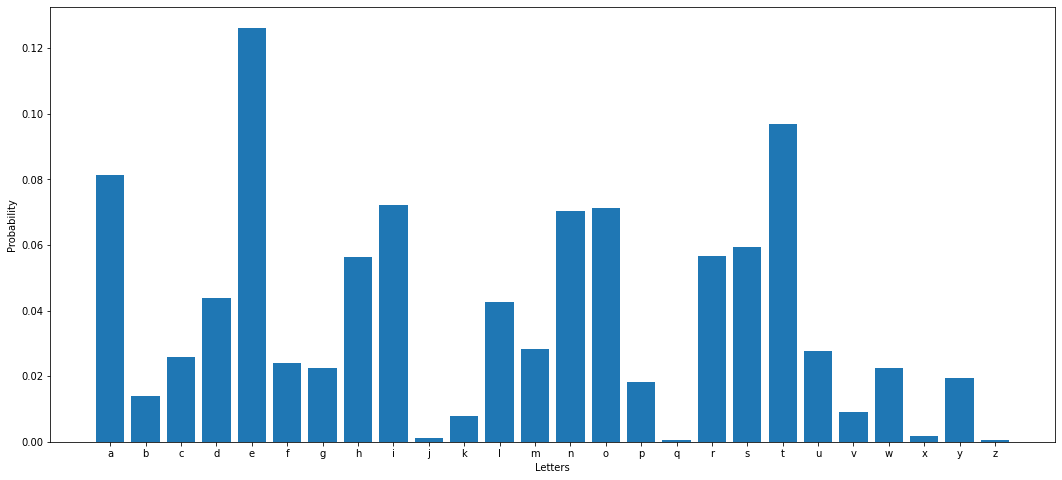

In [80]:
fig, ax = plt.subplots(1, figsize=[18, 8])
ax.bar(range(len(letters)), letters_probability.values())
ax.set_xticks(range(len(letters_count)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letters')
ax.set_ylabel('Probability')
fig;

In [70]:
letters_prob = list(letters_probability.values())

In [81]:
import numpy as np

entropy = -sum(letters_prob * np.log2(letters_prob + np.finfo(float).eps))
entropy

4.173084127748858

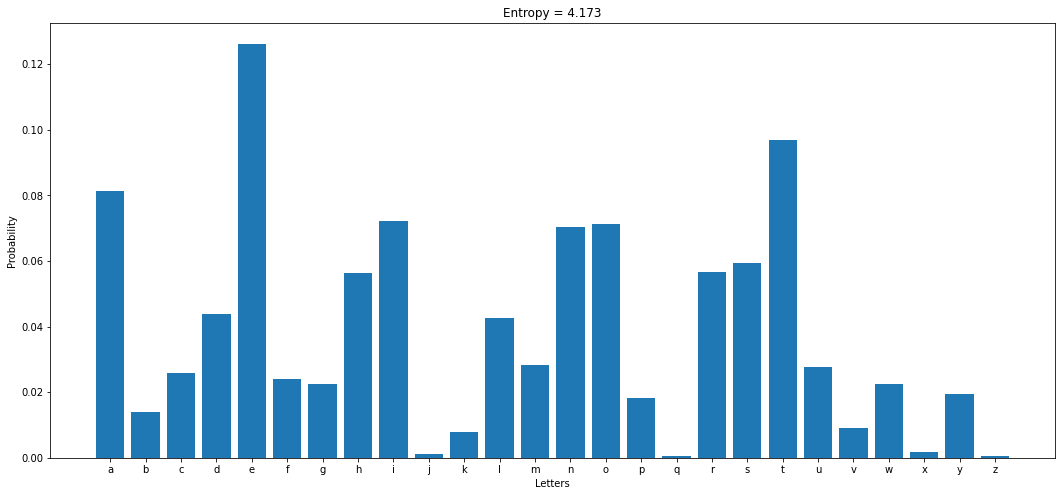

In [83]:
ax.set_title('Entropy = %.3f'%entropy)
figs

# Conditional (sequential) entropy

Some letters are more likely to apear next to other letters.

In [114]:
list_of_pairs_occurencies = {}

for letter in letters:
  # a
  list_of_pairs_occurencies.update({letter:{}})

  for next_letter in letters:
    # aa, ab, ac...
    pair = letter + next_letter
    pair_occurencies = text.lower().count(pair)
    list_of_pairs_occurencies[letter].update({next_letter:pair_occurencies})

In [135]:
list_of_pairs_occurencies['a']['b']

304

In [136]:
sum(list_of_pairs_occurencies['a'].values())

11771

In [147]:
list_of_pairs_probabilities = {}
for letter in list_of_pairs_occurencies:
  sum_of_pairs_occurencies = sum(list_of_pairs_occurencies[letter].values())
  list_of_pairs_probabilities.update({letter:{}})

  for next_letter in letters:
    pair_occurencies = list_of_pairs_occurencies[letter][next_letter]
    list_of_pairs_probabilities[letter].update({next_letter:pair_occurencies / sum_of_pairs_occurencies})

In [151]:
sum(list_of_pairs_probabilities['a'].values())

1.0

# Wordcloud

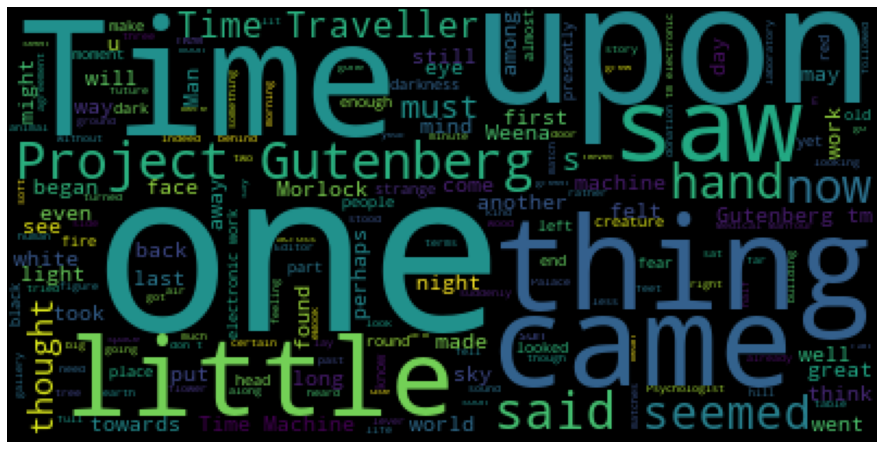

In [154]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)
plt.figure(figsize=[18, 8])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()